In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
train_data.shape
(404, 13)
test_data.shape
(102, 13)


(102, 13)

In [3]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [4]:
train_targets.shape

(404,)

In [5]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [6]:
mean = train_data.mean(axis=0)#In Pandas: axis=0 means along "indexes". It's a row-wise operatio
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

# For Reusability, model is defined as a function.

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],))) # number of features (13) are used as vector in input shape
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1)) # no activation function
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model

In [8]:
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold # ', i)
  # prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  # prepare the training data: data from data - k
    partial_train_data = np.concatenate(                    
      [train_data[:i * num_val_samples],
      train_data[(i + 1 ) * num_val_samples:]],
  axis = 0)
    partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
      train_targets[(i + 1 ) * num_val_samples:]],
  axis = 0)
  # Build the Keras Models (already commpiled)
    model = build_model()
  # Train the model (in silence mode, verbose = 0)
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs,batch_size = 1, verbose = 1)
  # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

processing fold #  0
Train on 303 samples
Epoch 1/100
303/303 [==============================] - 2s 7ms/sample - loss: 219.1878 - mae: 10.6380
Epoch 2/100
303/303 [==============================] - 1s 2ms/sample - loss: 29.1478 - mae: 3.6328
Epoch 3/100
303/303 [==============================] - 1s 2ms/sample - loss: 21.9141 - mae: 3.0716
Epoch 4/100
303/303 [==============================] - 1s 2ms/sample - loss: 18.7416 - mae: 2.8165
Epoch 5/100
303/303 [==============================] - 1s 2ms/sample - loss: 16.2962 - mae: 2.6758
Epoch 6/100
303/303 [==============================] - 1s 2ms/sample - loss: 15.1864 - mae: 2.5359
Epoch 7/100
303/303 [==============================] - 1s 2ms/sample - loss: 14.0303 - mae: 2.53880s - lo
Epoch 8/100
303/303 [==============================] - 1s 2ms/sample - loss: 13.7792 - mae: 2.3998
Epoch 9/100
303/303 [==============================] - 1s 2ms/sample - loss: 13.2879 - mae: 2.3974
Epoch 10/100
303/303 [==============================] - 1s

303/303 [==============================] - 1s 2ms/sample - loss: 4.9483 - mae: 1.4761
Epoch 83/100
303/303 [==============================] - 1s 2ms/sample - loss: 5.0774 - mae: 1.4478
Epoch 84/100
303/303 [==============================] - 1s 2ms/sample - loss: 5.0474 - mae: 1.5344
Epoch 85/100
303/303 [==============================] - 1s 2ms/sample - loss: 5.0203 - mae: 1.4677
Epoch 86/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.9518 - mae: 1.5086
Epoch 87/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.5456 - mae: 1.4341
Epoch 88/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.6919 - mae: 1.4674
Epoch 89/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.8702 - mae: 1.5225
Epoch 90/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.8947 - mae: 1.4955
Epoch 91/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.8221 - mae: 1.4531
Epoch 92/100
303/303 [=

303/303 [==============================] - 1s 2ms/sample - loss: 5.1863 - mae: 1.5084
Epoch 65/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.9986 - mae: 1.5320
Epoch 66/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.9102 - mae: 1.5302
Epoch 67/100
303/303 [==============================] - 1s 3ms/sample - loss: 5.0626 - mae: 1.4291
Epoch 68/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.2116 - mae: 1.4291
Epoch 69/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.8013 - mae: 1.5062
Epoch 70/100
303/303 [==============================] - 1s 2ms/sample - loss: 5.0530 - mae: 1.5202
Epoch 71/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.2001 - mae: 1.4600
Epoch 72/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.6589 - mae: 1.4910
Epoch 73/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.8877 - mae: 1.4568
Epoch 74/100
303/303 [=

303/303 [==============================] - 1s 2ms/sample - loss: 4.9930 - mae: 1.6170
Epoch 47/100
303/303 [==============================] - 1s 2ms/sample - loss: 5.1138 - mae: 1.5668
Epoch 48/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.9583 - mae: 1.5635
Epoch 49/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.8209 - mae: 1.5173
Epoch 50/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.2718 - mae: 1.4853
Epoch 51/100
303/303 [==============================] - 1s 2ms/sample - loss: 5.0361 - mae: 1.5705
Epoch 52/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.7794 - mae: 1.5319
Epoch 53/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.7097 - mae: 1.5295
Epoch 54/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.6008 - mae: 1.4861
Epoch 55/100
303/303 [==============================] - 1s 2ms/sample - loss: 4.5015 - mae: 1.5240
Epoch 56/100
303/303 [=

303/303 [==============================] - 1s 2ms/sample - loss: 7.7952 - mae: 1.7788
Epoch 29/100
303/303 [==============================] - 1s 2ms/sample - loss: 7.7364 - mae: 1.7937
Epoch 30/100
303/303 [==============================] - 1s 2ms/sample - loss: 7.2793 - mae: 1.7550
Epoch 31/100
303/303 [==============================] - 1s 2ms/sample - loss: 7.2746 - mae: 1.7951
Epoch 32/100
303/303 [==============================] - 1s 2ms/sample - loss: 7.2630 - mae: 1.7986
Epoch 33/100
303/303 [==============================] - 1s 2ms/sample - loss: 6.7437 - mae: 1.7282
Epoch 34/100
303/303 [==============================] - 1s 2ms/sample - loss: 7.1784 - mae: 1.7814
Epoch 35/100
303/303 [==============================] - 1s 2ms/sample - loss: 6.8140 - mae: 1.7178
Epoch 36/100
303/303 [==============================] - 1s 2ms/sample - loss: 6.9340 - mae: 1.7372
Epoch 37/100
303/303 [==============================] - 1s 2ms/sample - loss: 6.7424 - mae: 1.7631
Epoch 38/100
303/303 [=

In [9]:
all_scores

[2.0251644, 2.2901309, 2.9197736, 2.2728546]

In [10]:
np.mean(all_scores)

2.3769808

# Updating the Epochs

In [ ]:
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('processing fold # ', i)
  # prepare the validation data: data from partition # k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  # prepare the training data: data from data - k
  partial_train_data = np.concatenate(                    
      [train_data[:i * num_val_samples],
      train_data[(i + 1 ) * num_val_samples:]],
  axis = 0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
      train_targets[(i + 1 ) * num_val_samples:]],
  axis = 0)
  # Build the Keras Models (already commpiled)
  model = build_model()
  # Train the model (in silence mode, verbose = 0)
  history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data, val_targets), epochs = num_epochs, batch_size = 1, verbose = 1)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

In [12]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

C:\Users\Usama Khan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Usama Khan\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Plotting Validation Scores

In [13]:
import matplotlib.pyplot as plt


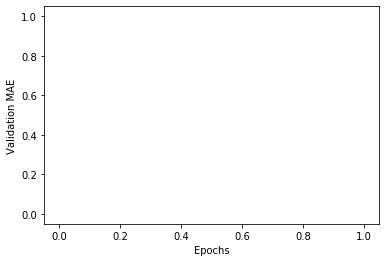

In [15]:
plt.plot(range(1, len(average_mae_history) + 1 ), average_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

# Plotting Validation Scores - Excluding the first 10 data points

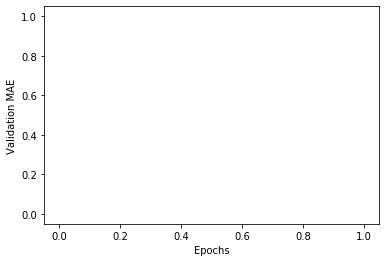

In [16]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1- factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Training the final model

In [17]:
model = build_model()

#Training on Entire Data
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Train on 404 samples
Epoch 1/80
404/404 [==============================] - 1s 2ms/sample - loss: 507.7095 - mae: 20.5658
Epoch 2/80
404/404 [==============================] - 0s 165us/sample - loss: 332.0061 - mae: 16.0385
Epoch 3/80
404/404 [==============================] - 0s 126us/sample - loss: 153.6165 - mae: 9.9926
Epoch 4/80
404/404 [==============================] - 0s 139us/sample - loss: 64.1220 - mae: 5.9709
Epoch 5/80
404/404 [==============================] - 0s 163us/sample - loss: 37.4527 - mae: 4.4487
Epoch 6/80
404/404 [==============================] - 0s 172us/sample - loss: 27.9662 - mae: 3.7782
Epoch 7/80
404/404 [==============================] - 0s 180us/sample - loss: 23.8936 - mae: 3.4365
Epoch 8/80
404/404 [==============================] - 0s 174us/sample - loss: 21.3058 - mae: 3.1868
Epoch 9/80
404/404 [==============================] - 0s 153us/sample - loss: 19.2153 - mae: 3.0430
Epoch 10/80
404/404 [==============================] - 0s 174us/sample - los

In [18]:
test_mse_score

18.162157544902726

ValueError: Error when checking input: expected dense_15_input to have shape (13,) but got array with shape (1,)